In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [2]:
df.shape

(1000, 10)

In [3]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


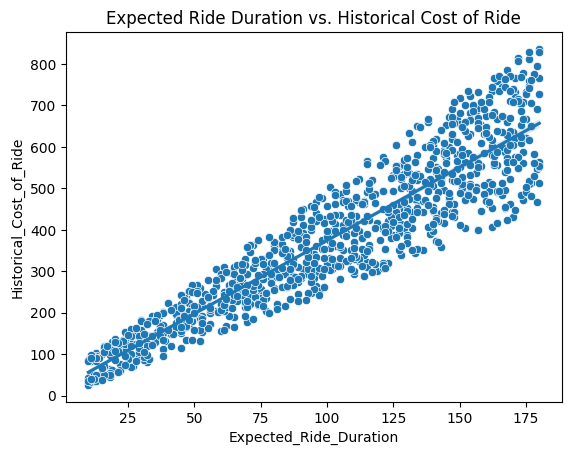

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df)
# Linear regression trendline with Seaborn
sns.regplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df, scatter=False)
plt.title('Expected Ride Duration vs. Historical Cost of Ride')
plt.show()


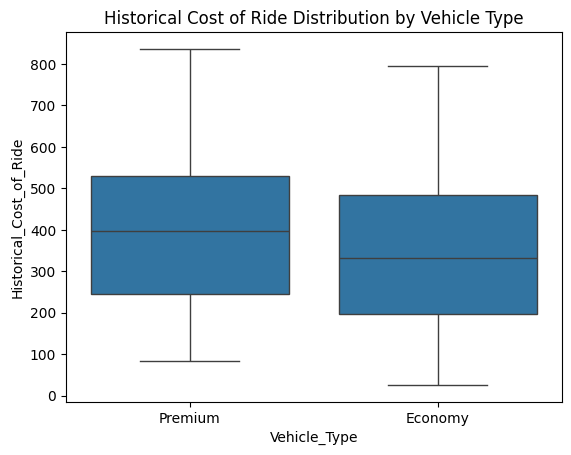

In [5]:
# Box plot with Seaborn
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Cost of Ride Distribution by Vehicle Type')
plt.show()

In [6]:
# `df` contains both numeric and non-numeric columns
#so we want only numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]


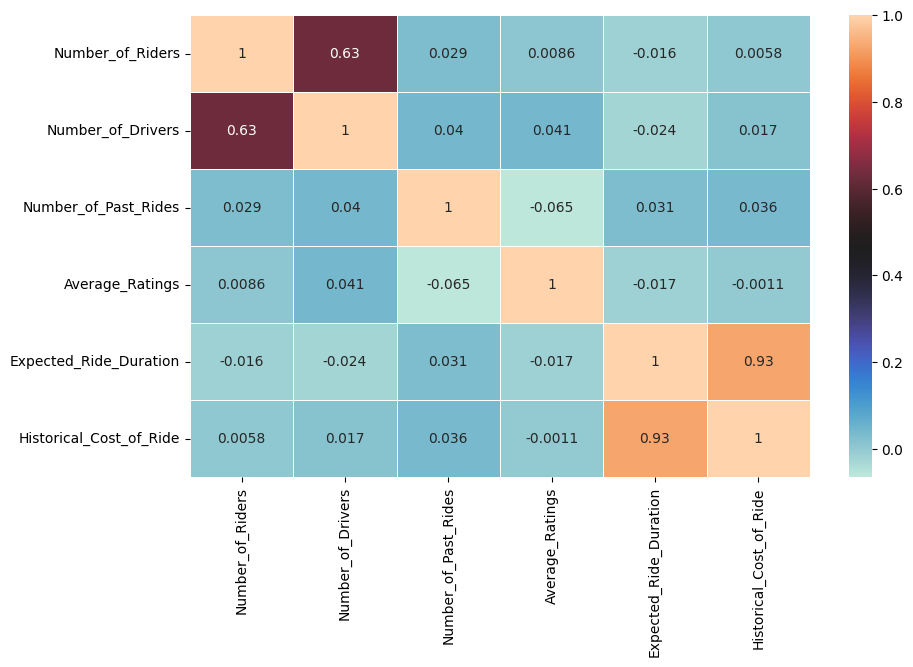

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="icefire",linewidth = 0.7)
plt.show()


In [8]:
# Assuming df is your DataFrame
df["Adjusted_Ride_Cost"] = df["Number_of_Riders"] * df["Historical_Cost_of_Ride"]
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Adjusted_Ride_Cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,25583.154572
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,10084.735659
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,13851.409696
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,41847.909626
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,45215.150944


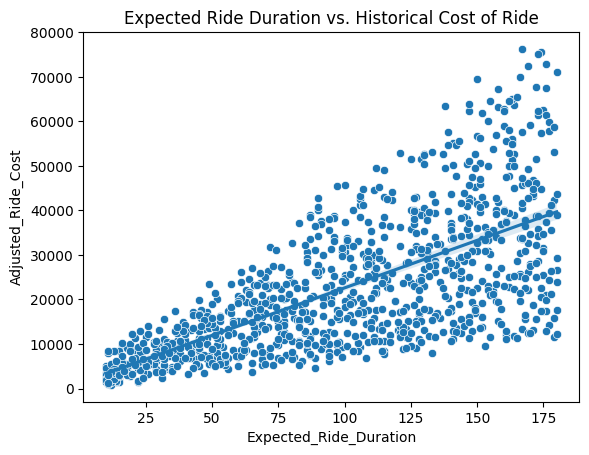

In [9]:


sns.scatterplot(x='Expected_Ride_Duration',y='Adjusted_Ride_Cost', data=df)
# Linear regression trendline with Seaborn
sns.regplot(x='Expected_Ride_Duration', y='Adjusted_Ride_Cost', data=df, scatter=False)
plt.title('Expected Ride Duration vs. Historical Cost of Ride')
plt.show()


In [10]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
Adjusted_Ride_Cost         0
dtype: int64

In [11]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Location_Category"] = label_encoder.fit_transform(df["Location_Category"])
df["Customer_Loyalty_Status"] = label_encoder.fit_transform(df["Customer_Loyalty_Status"])
df["Time_of_Booking"] = label_encoder.fit_transform(df["Time_of_Booking"])
df["Vehicle_Type"] = label_encoder.fit_transform(df["Vehicle_Type"])


In [12]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Adjusted_Ride_Cost
0,90,45,2,2,13,4.47,3,1,90,284.257273,25583.154572
1,58,39,1,2,72,4.06,1,0,43,173.874753,10084.735659
2,42,31,0,2,0,3.99,0,1,76,329.795469,13851.409696
3,89,28,0,1,67,4.31,0,1,134,470.201232,41847.909626
4,78,22,0,1,74,3.77,0,0,149,579.681422,45215.150944


In [13]:
df["Average_Ratings"] = df["Average_Ratings"].astype("int").round(0)
df["Historical_Cost_of_Ride"] = df["Historical_Cost_of_Ride"].astype("int").round(0)
df["Average_Ratings"] = df["Average_Ratings"].astype("int").round(0)
df["Adjusted_Ride_Cost"] = df["Adjusted_Ride_Cost"].astype("int").round(0)


In [14]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Adjusted_Ride_Cost
0,90,45,2,2,13,4,3,1,90,284,25583
1,58,39,1,2,72,4,1,0,43,173,10084
2,42,31,0,2,0,3,0,1,76,329,13851
3,89,28,0,1,67,4,0,1,134,470,41847
4,78,22,0,1,74,3,0,0,149,579,45215


In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Number_of_Riders", "Number_of_Drivers","Expected_Ride_Duration"]])
y = np.array(df[["Adjusted_Ride_Cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)


Linear Regression - Mean Squared Error: 46097660.00721605
Linear Regression - R-squared: 0.8061737217632294


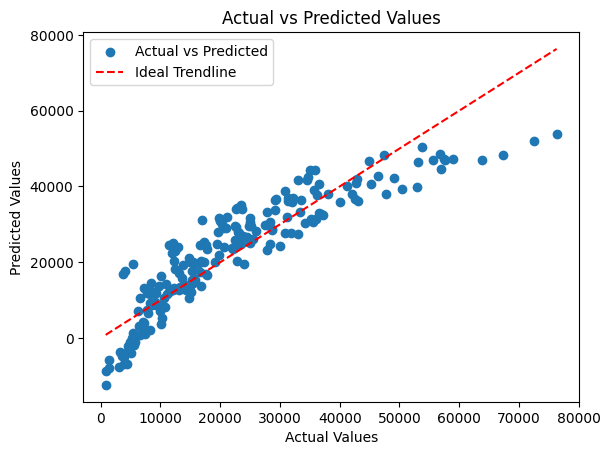

In [23]:

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R-squared: {r2_linear}')

# Visualize actual vs predicted values with trendline
plt.scatter(y_test,y_pred_linear, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Trendline')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [16]:
# Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

Mean Squared Error: 25264614.8882125
R-squared: 0.8937701767486469


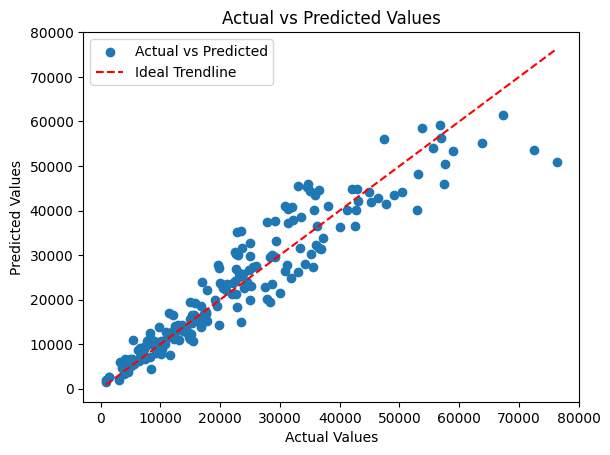

In [17]:

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


# Visualize actual vs predicted values with trendline
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Trendline')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
